In [5]:
import nibabel as nib

In [6]:
t1_img = nib.load("./data/test/020822_1_20220802_171408/DRF_100.nii.gz")

FileNotFoundError: No such file or no access: './data/test/020822_1_20220802_171408/DRF_100.nii.gz'

In [3]:
t1_hdr = t1_img.header
print(t1_hdr)

NameError: name 't1_img' is not defined

In [7]:
t1_hdr.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

t1_data = t1_img.get_fdata()
t1_data

x_slice = t1_data[9, :, :]

y_slice = t1_data[:, 19, :]

z_slice = t1_data[:, :, 2]

slices = [x_slice, y_slice, z_slice]



fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

NameError: name 't1_img' is not defined

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread
BASE_IMG_PATH=os.path.join('.','data')
glob(os.path.join(BASE_IMG_PATH,'3d_images','*'))

In [14]:


all_images=glob('./data/test/020822_1_20220802_171408/DRF_100.nii.gz')
all_masks = [x.replace('IMG_', 'MASK_') for x in all_images]
print(len(all_images),' matching files found:',all_images[0], all_masks[0])

1  matching files found: ./data/test/020822_1_20220802_171408/DRF_100.nii.gz ./data/test/020822_1_20220802_171408/DRF_100.nii.gz


/Users/randyllpandohie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/Users/randyllpandohie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


Text(0.5, 1.0, 'Mask')

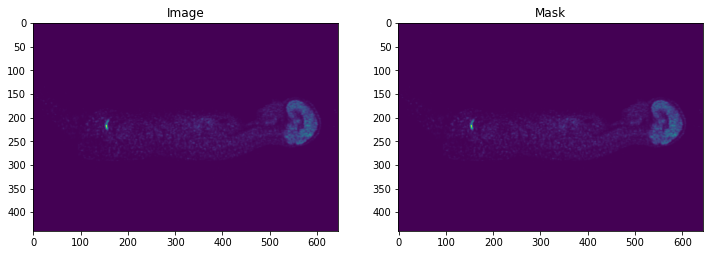

In [15]:
%matplotlib inline
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

test_image=nib.load(all_images[0]).get_data()
test_mask=nib.load(all_masks[0]).get_data()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[0]//2])
ax1.set_title('Image')
ax2.imshow(test_mask[test_image.shape[0]//2])
ax2.set_title('Mask')

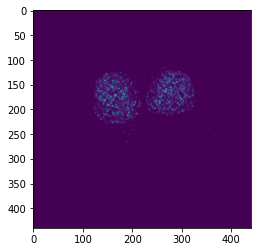

In [15]:
import pydicom
import matplotlib.pyplot as plt

filePath = '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.644.2022.06.09.18.13.47.251000.4.0.193454626.IMA'
img = pydicom.read_file(filePath)

#img1=pydicom.filereader.read_sequence('/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/',is_implicit_VR=True, is_little_endian=True, bytelength=60,encoding=64)

#img1=pydicom.dcmread('/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose')

#plt.imshow(img1.pixel_array)
#plt.show()

plt.imshow(img.pixel_array)
plt.show()

In [13]:
from pathlib import Path
from tempfile import TemporaryDirectory
import warnings

from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.fileset import FileSet
from pydicom.uid import generate_uid

warnings.filterwarnings("ignore")

path = get_testdata_file('DICOMDIR')
# A File-set can be loaded from the path to its DICOMDIR dataset or the
#   dataset itself
fs = FileSet(path)  # or fs = FileSet(dcmread(path))

# A summary of the File-set's contents can be seen when printing
print(fs)
print()

# Iterating over the FileSet yields FileInstance objects
for instance in fs:
    # Load the corresponding SOP Instance dataset
    ds = instance.load()
    # Do something with each dataset

# We can search the File-set
patient_ids = fs.find_values("PatientID")
for patient_id in patient_ids:
    # Returns a list of FileInstance, where each one represents an available
    #   SOP Instance with a matching *Patient ID*
    result = fs.find(PatientID=patient_id)
    print(
        f"PatientName={result[0].PatientName}, "
        f"PatientID={result[0].PatientID}"
    )

    # Search available studies
    study_uids = fs.find_values("StudyInstanceUID", instances=result)
    for study_uid in study_uids:
        result = fs.find(PatientID=patient_id, StudyInstanceUID=study_uid)
        print(
            f"  StudyDescription='{result[0].StudyDescription}', "
            f"StudyDate={result[0].StudyDate}"
        )

        # Search available series
        series_uids = fs.find_values("SeriesInstanceUID", instances=result)
        for series_uid in series_uids:
            result = fs.find(
                PatientID=patient_id,
                StudyInstanceUID=study_uid,
                SeriesInstanceUID=series_uid
            )
            plural = ['', 's'][len(result) > 1]

            print(
                f"    Modality={result[0].Modality} - "
                f"{len(result)} SOP Instance{plural}"
            )

# Of course you can just get the instances directly if you know what you want
series_uid = "1.3.6.1.4.1.5962.1.1.0.0.0.1196533885.18148.0.118"
result = fs.find(SeriesInstanceUID=series_uid)
print(f"\nFound {len(result)} instances for SeriesInstanceUID={series_uid}")

# We can search the actual stored SOP Instances by using `load=True`
# This can be useful as the DICOMDIR's directory records only contain a
#   limited subset of the available elements, however its less efficient
result = fs.find(load=False, PhotometricInterpretation="MONOCHROME1")
result_load = fs.find(load=True, PhotometricInterpretation="MONOCHROME1")
print(
    f"Found {len(result)} instances with "
    f"PhotometricInterpretation='MONOCHROME1' without loading the stored "
    f"instances and {len(result_load)} instances with loading"
)

# We can remove and add instances to the File-set
fs.add(get_testdata_file("CT_small.dcm"))
fs.add(get_testdata_file("MR_small.dcm"))
result = fs.find(StudyDescription="'XR C Spine Comp Min 4 Views'")
fs.remove(result)

# To edit the elements in the DICOMDIR's File-set Identification Module
#   (Part 3, Annex F.3.2.1) use the following properties:
# (0004,1130) File-set ID
fs.ID = "MY FILESET"
# Change the File-set's UID
fs.UID = generate_uid()
# (0004,1141) File-set Descriptor File ID
fs.descriptor_file_id = "README"
# (0004,1142) Specific Character Set of File-set Descriptor File
fs.descriptor_character_set = "ISO_IR 100"

# Changes to the File-set are staged until write() is called
# Calling write() will update the File-set's directory structure to meet the
#   semantics used by pydicom File-sets (if required), add/remove instances and
#   and re-write the DICOMDIR file
# We don't do it here because it would overwrite your example data
# fs.write()

# Alternatively, the File-set can be copied to a new root directory
#   This will apply any staged changes while leaving the original FileSet
#   object unchanged
tdir = TemporaryDirectory()
new_fileset = fs.copy(tdir.name)
print(f"\nOriginal File-set still at {fs.path}")
root = Path(new_fileset.path)
print(f"File-set copied to {root} and contains the following files:")
# Note how the original File-set directory layout has been changed to
#   the structure used by pydicom
for p in sorted(root.glob('**/*')):
    if p.is_file():
        print(f"  {p.relative_to(root)}")

DICOM File-set
  Root directory: /Users/randyllpandohie/opt/anaconda3/lib/python3.7/site-packages/pydicom/data/test_files/dicomdirtests
  File-set ID: PYDICOM_TEST
  File-set UID: 1.2.276.0.7230010.3.1.4.0.31906.1359940846.78187
  Descriptor file ID: (no value available)
  Descriptor file character set: (no value available)
  Changes staged for write(): DICOMDIR update, directory structure update

  Managed instances:
    PATIENT: PatientID='77654033', PatientName='Doe^Archibald'
      STUDY: StudyDate=20010101, StudyTime=000000, StudyDescription='XR C Spine Comp Min 4 Views'
        SERIES: Modality=CR, SeriesNumber=1
          IMAGE: 1 SOP Instance
        SERIES: Modality=CR, SeriesNumber=2
          IMAGE: 1 SOP Instance
        SERIES: Modality=CR, SeriesNumber=3
          IMAGE: 1 SOP Instance
      STUDY: StudyDate=19950903, StudyTime=173032, StudyDescription='CT, HEAD/BRAIN WO CONTRAST'
        SERIES: Modality=CT, SeriesNumber=2
          IMAGE: 4 SOP Instances
    PATIENT: Pa



Slice location...: -1061.5


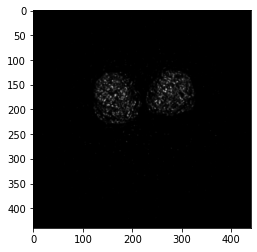

In [16]:
# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

#fpath = get_testdata_file('CT_small.dcm')
#fpath = get_testdata_file('/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/')

ds = dcmread('/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.644.2022.06.09.18.13.47.251000.4.0.193454626.IMA')

# Normal mode:
print()
#print(f"File path........: {fpath}")
#print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

#pat_name = ds.PatientName
#print(f"Patient's Name...: {pat_name.family_comma_given()}")
#print(f"Patient ID.......: {ds.PatientID}")
#print(f"Modality.........: {ds.Modality}")
#print(f"Study Date.......: {ds.StudyDate}")
#print(f"Image size.......: {ds.Rows} x {ds.Columns}")
#print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

In [17]:
import glob

files = glob.glob("/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/*.IMA")
files

['/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.231.2022.06.09.18.13.45.991000.4.0.193442502.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.602.2022.06.09.18.13.47.125000.4.0.193451050.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.240.2022.06.09.18.13.46.018000.4.0.193442610.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.328.2022.06.09.18.13.46.288000.4.0.193443666.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062022_1.PT.8.348.2022.06.09.18.13.46.348000.4.0.193443906.IMA',
 '/Users/randyllpandohie/Downloads/Siemens Vision Quadra/Subject_136-141/09062022_1_20220609_163454/Full_dose/09062

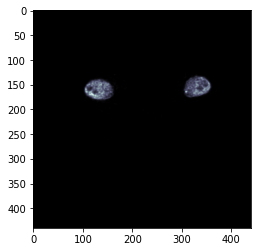

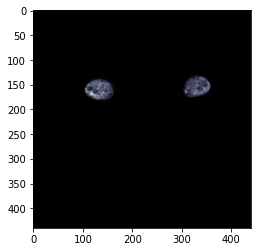

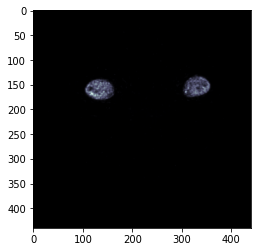

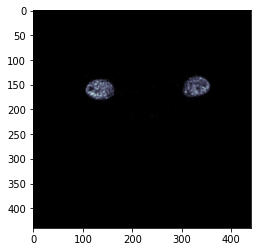

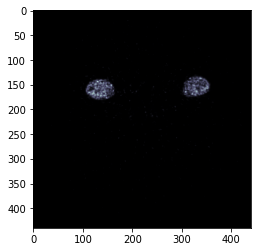

In [18]:
from PIL import Image

def show_img(img_path):
    ds = dcmread(img_path)
    im = Image.fromarray(ds.pixel_array)
    #im = im.resize((DESIRED_SIZE,DESIRED_SIZE)) 
    #im.show()
    plt.imshow(im, cmap=plt.cm.bone)
    plt.show()
    

import re

files.sort(key=lambda f: int(re.sub('\D', '', f)))
files
    
show_img(files[5])
show_img(files[4])
show_img(files[3])
show_img(files[2])
show_img(files[1])
#for file in files:
#    show_img(file)